# Project Part 1


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1OywLELlT28ONMsIgJU3vpLUHyICU9TnI?usp=sharing)



## Introduction/Background

I'm going to attempt to judge a book by it's title. I'm using the dataset books.csv which was created by kaggle user Soumik by scraping data from the goodreads API (https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks?select=books.csv). Goodreads is a popular website that lists books and allows users to rate and review them. The dataset contains the following features: title, authors, average rating, isbn, language, page numbers, number of ratings, and number of reviews. 

I'm going to develop a model based on this dataset that will take a hypothetical book title as an input, like 'the october rhinocerous' and output a prediction of its rating from 0.00 to 5.00 stars. this could be interpreted as either classification (with each integer amount of stars being a seperate catagory) or regression. As it is more closely aligned with the dataset, i'm going to interpret it as regression: predicting the relationship between the continuous dependent variable rating and the independent variable title.



## Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [2]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# ...

books= pd.read_csv('books_pre_clean.csv')
#drop unnecessary columns and clean up data

books.head(2)

,Unnamed: 0,bookId,title,author,series,description,genres,awards,characters,places,...,publish_date,num_pages,num_ratings,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5
0,0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,Harry Potter #6,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...",Locus Award Nominee for Best Young Adult Novel...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",...,September 16th 2006,652.0,2553909.0,41470.0,4.57,13147.0,29020.0,174312.0,608825.0,1728605.0
1,1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",Harry Potter #5,There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Works for Young Readers ...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,September 2004,870.0,2631427.0,44793.0,4.50,16236.0,41738.0,231438.0,665628.0,1676387.0


In [3]:
books['genres'].value_counts(dropna=False)

Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult,Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult                                                                                                                                                                        4831
NaN                                                                                                                                                                                                                                                                                               

In [4]:
books['language'].value_counts(dropna=False)

English                      16321
NaN                           2776
Spanish                        449
German                         195
French                         170
Japanese                        47
Multiple languages              24
Italian                         14
Chinese                         14
Portuguese                      13
Greek, Ancient to 1453          10
Russian                          9
Arabic                           4
Latin                            4
Dutch                            3
Turkish                          2
English, Middle 1100-1500        2
Danish                           2
Greek, Modern 1453-              2
Munda languages                  1
Norwegian                        1
Ladino                           1
Serbian                          1
Name: language, dtype: int64

In [5]:
books.drop(books.columns[[0, 1, 4, 6, 7, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1, inplace=True)

In [6]:
books = books[books['language'] == 'English']
len(books)

16321

In [7]:
books.isna().sum()

title              0
author             1
description     1260
characters     12273
places         12913
language           0
dtype: int64

In [8]:
books.drop(['characters', 'places'], axis=1, inplace=True)

In [9]:
books.dropna(inplace=True)
books.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

books.head(2)

,title,author,description,language
0,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,English
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,English


In [10]:
len(books)

14719

In [11]:
books.describe()

,title,author,description,language
count,14719,14719,14719,14719
unique,13002,9339,14324,1
top,The Lord of the Rings,P.G. Wodehouse,This scarce antiquarian book is a facsimile re...,English
freq,20,86,53,14719


In [22]:
books.to_csv("books_clean.csv", index=False)

<AxesSubplot:>

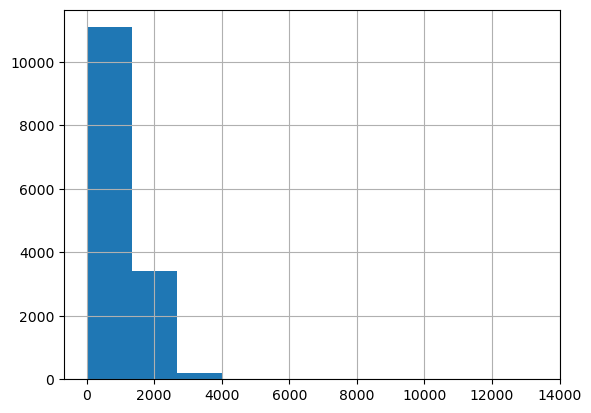

In [13]:
#text statistics
# number of characters per title
books['description'].str.len().hist()

<AxesSubplot:>

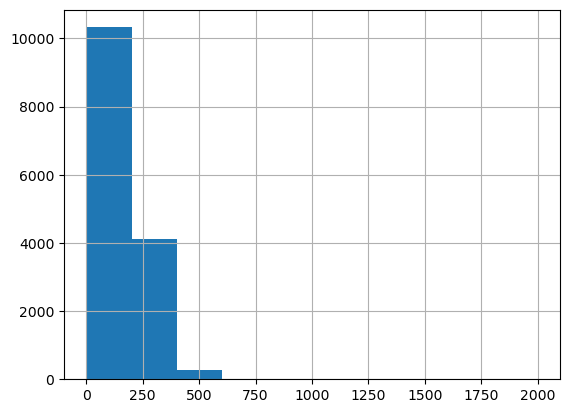

In [14]:
#number of words per Description
books['description'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

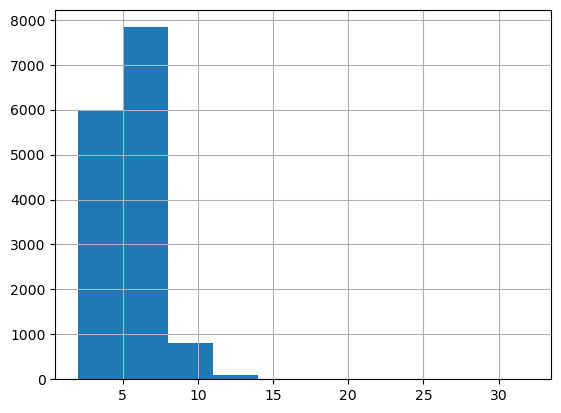

In [15]:
#avg word length
books['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [16]:
stop=set(stopwords.words('english'))

corpus=[]
new= books['title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

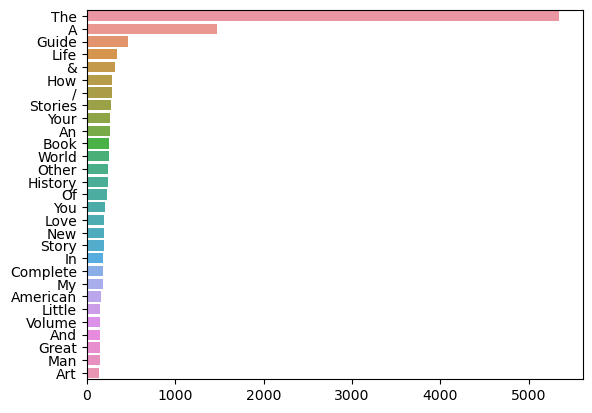

In [17]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

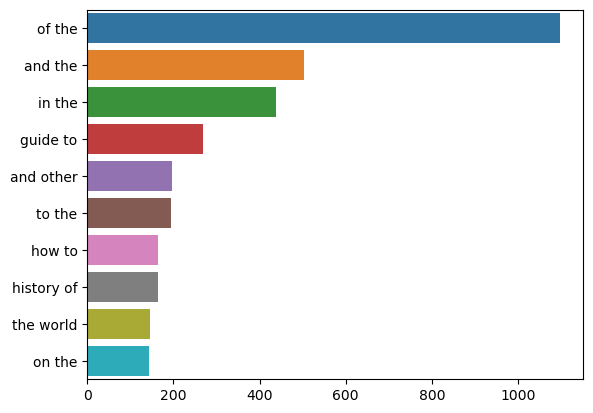

In [18]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(books['title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

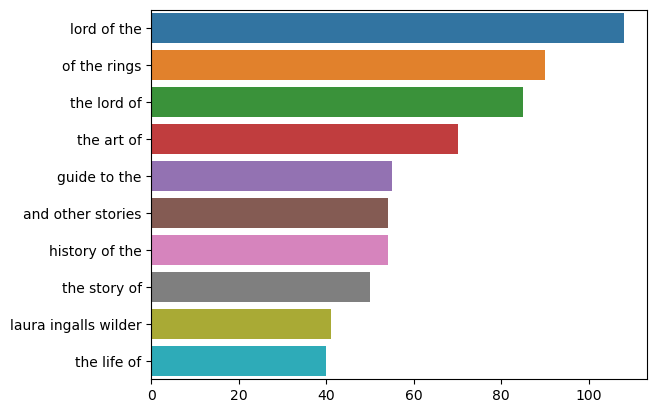

In [19]:
#trigrams
top_tri_grams=get_top_ngram(books['title'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [20]:
#parts of speech.
#TODO: debug
# currently throws "Output exceeds the size limit." error on line 8: tags=books['title'].apply(lambda x : pos(x))

def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=books['title'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/lfickling/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


<AxesSubplot:>

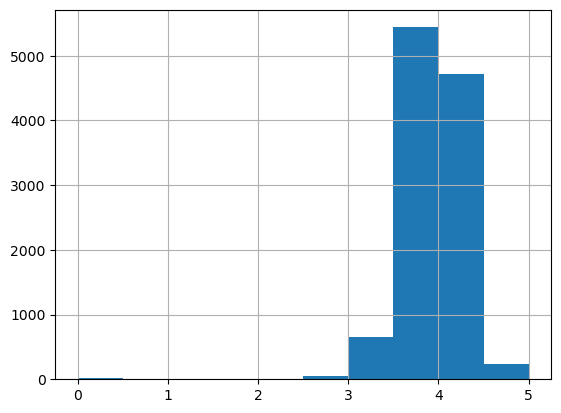

In [ ]:
#descriptive statistics: 
#ratings dist
books['average_rating'].hist()

In [ ]:
#TODO: relationships between titles and rating